In [63]:
import pandas as pd
import json
import re

df = pd.read_csv("csv\output\Report_Shorts_with_summary_stefan_provocation_experimentResults.csv")

In [64]:
def extract_json(row):
    try:
        # Find the first JSON-like structure in the row
        match = re.search(r'{.*?}', row)
        if match:
            json_str = match.group()
            return json.loads(json_str)  # Parse the JSON data
    except json.JSONDecodeError:
        pass  # In case of parsing error, return None or handle as needed
    return None

### Clean JSON Columns from additional Text

In [65]:
# Apply the function to all Json Columns
df['low ssc defined'] = df['low ssc defined'].apply(extract_json)
df['high ssc defined'] = df['high ssc defined'].apply(extract_json)
df['low ssc characteristics'] = df['low ssc characteristics'].apply(extract_json)
df['high ssc characteristics'] = df['high ssc characteristics'].apply(extract_json) 

df.head()

,Video ID,Video Title,Channel Title,Transcript,Duration,Words per Second,Number of Comments,Top10 Comments,Category,Views,...,Custom Query,LLM Summary,low ssc characteristics st,high ssc characteristics st,low ssc defined st,high ssc defined st,low ssc characteristics,high ssc characteristics,low ssc defined,high ssc defined
0,4QP5CvHB1s0,b'Neymar provocation \xf0\x9f\xa4\xab\xf0\x9f\...,b'FunChannel',songs [Music] [Music],9.198,0.434877,457,"['Check out our TikTok: <a href=""https://vm.ti...",b'Sports',2941912,...,"You are a copywriter, create a 100 word summar...",This YouTube short from FunChannel features a...,You are a person with following characteristic...,You are a person with following characteristic...,You are a person with low state self control a...,You are a person with high state self control ...,{'aggression': 2},{'aggression': 1},{'aggression': 3},{'aggression': 1}
1,4ChtDj7GpIc,"b""Rescued kitten's provocation! Inspired by a ...",b'\xe3\x81\xad\xe3\x81\x93\xe3\x81\xb1\xe3\x82...,[Music] for,19.220,0.156087,103,"['i’m obsessed with this little guy 😍', '😅Mu, ...",b'Pets & Animals',31849,...,"You are a copywriter, create a 100 word summar...",In this lighthearted YouTube short from the c...,You are a person with following characteristic...,You are a person with following characteristic...,You are a person with low state self control a...,You are a person with high state self control ...,{'aggression': 1},{'aggression': 1},{'aggression': 1},{'aggression': 1}
2,qJU8I4KWpJs,"b""\xf0\x9f\x90\xb1 Paws & Provocation | Rescue...",b'\xe3\x81\xad\xe3\x81\x93\xe3\x81\xb1\xe3\x82...,[Music] thank you,25.630,0.156067,123,['Mu is getting kisses whilst he’s trying to a...,b'Pets & Animals',79152,...,"You are a copywriter, create a 100 word summar...","This YouTube short from the channel ""e381ade...",You are a person with following characteristic...,You are a person with following characteristic...,You are a person with low state self control a...,You are a person with high state self control ...,{'aggression': 1},{'aggression': 1},{'aggression': 1},{'aggression': 1}
3,06YOF1p-2Xw,b'La provocation ultime \xf0\x9f\x98\x82\xf0\x...,b'Tasawar ato',oh [Music],11.090,0.270514,1,['Avec des magnifiques oreilles comme ca tkt o...,b'Entertainment',2173,...,"You are a copywriter, create a 100 word summar...","This brief YouTube video titled ""La provocat...",You are a person with following characteristic...,You are a person with following characteristic...,You are a person with low state self control a...,You are a person with high state self control ...,{'aggression': 1},{'aggression': 1},{'aggression': 1},{'aggression': 1}
4,SQYkxbDVxGQ,b'CONTROL YOURSELF UNDER PROVOCATION - ENCHIR...,b'Stoic Sanity',remember that not he who gives Hill language o...,48.641,1.356880,2,['You should upload these to Twitter'],b'People & Blogs',1428,...,"You are a copywriter, create a 100 word summar...","This Stoic Sanity YouTube short, titled ""CO...",You are a person with following characteristic...,You are a person with following characteristic...,You are a person with low state self control a...,You are a person with high state self control ...,{'aggression': 2},{'aggression': 1},{'aggression': 3},{'aggression': 1}


In [66]:
df['low ssc characteristics'] = df['low ssc characteristics'].apply(
    lambda x: x.get('aggression', None) if isinstance(x, dict) else None
)

df['high ssc characteristics'] = df['high ssc characteristics'].apply(
    lambda x: x.get('aggression', None) if isinstance(x, dict) else None
)

df['low ssc defined'] = df['low ssc defined'].apply(
    lambda x: x.get('aggression', None) if isinstance(x, dict) else None
)

df['high ssc defined'] = df['high ssc defined'].apply(
    lambda x: x.get('aggression', None) if isinstance(x, dict) else None
)

df.head()

,Video ID,Video Title,Channel Title,Transcript,Duration,Words per Second,Number of Comments,Top10 Comments,Category,Views,...,Custom Query,LLM Summary,low ssc characteristics st,high ssc characteristics st,low ssc defined st,high ssc defined st,low ssc characteristics,high ssc characteristics,low ssc defined,high ssc defined
0,4QP5CvHB1s0,b'Neymar provocation \xf0\x9f\xa4\xab\xf0\x9f\...,b'FunChannel',songs [Music] [Music],9.198,0.434877,457,"['Check out our TikTok: <a href=""https://vm.ti...",b'Sports',2941912,...,"You are a copywriter, create a 100 word summar...",This YouTube short from FunChannel features a...,You are a person with following characteristic...,You are a person with following characteristic...,You are a person with low state self control a...,You are a person with high state self control ...,2.0,1.0,3.0,1.0
1,4ChtDj7GpIc,"b""Rescued kitten's provocation! Inspired by a ...",b'\xe3\x81\xad\xe3\x81\x93\xe3\x81\xb1\xe3\x82...,[Music] for,19.220,0.156087,103,"['i’m obsessed with this little guy 😍', '😅Mu, ...",b'Pets & Animals',31849,...,"You are a copywriter, create a 100 word summar...",In this lighthearted YouTube short from the c...,You are a person with following characteristic...,You are a person with following characteristic...,You are a person with low state self control a...,You are a person with high state self control ...,1.0,1.0,1.0,1.0
2,qJU8I4KWpJs,"b""\xf0\x9f\x90\xb1 Paws & Provocation | Rescue...",b'\xe3\x81\xad\xe3\x81\x93\xe3\x81\xb1\xe3\x82...,[Music] thank you,25.630,0.156067,123,['Mu is getting kisses whilst he’s trying to a...,b'Pets & Animals',79152,...,"You are a copywriter, create a 100 word summar...","This YouTube short from the channel ""e381ade...",You are a person with following characteristic...,You are a person with following characteristic...,You are a person with low state self control a...,You are a person with high state self control ...,1.0,1.0,1.0,1.0
3,06YOF1p-2Xw,b'La provocation ultime \xf0\x9f\x98\x82\xf0\x...,b'Tasawar ato',oh [Music],11.090,0.270514,1,['Avec des magnifiques oreilles comme ca tkt o...,b'Entertainment',2173,...,"You are a copywriter, create a 100 word summar...","This brief YouTube video titled ""La provocat...",You are a person with following characteristic...,You are a person with following characteristic...,You are a person with low state self control a...,You are a person with high state self control ...,1.0,1.0,1.0,1.0
4,SQYkxbDVxGQ,b'CONTROL YOURSELF UNDER PROVOCATION - ENCHIR...,b'Stoic Sanity',remember that not he who gives Hill language o...,48.641,1.356880,2,['You should upload these to Twitter'],b'People & Blogs',1428,...,"You are a copywriter, create a 100 word summar...","This Stoic Sanity YouTube short, titled ""CO...",You are a person with following characteristic...,You are a person with following characteristic...,You are a person with low state self control a...,You are a person with high state self control ...,2.0,1.0,3.0,1.0


In [67]:
average_low_ssc_characteristics = df['low ssc characteristics'].mean()
average_high_ssc_characteristics = df['high ssc characteristics'].mean()
average_low_ssc_defined = df['low ssc defined'].mean()
average_high_ssc_defined = df['high ssc defined'].mean()



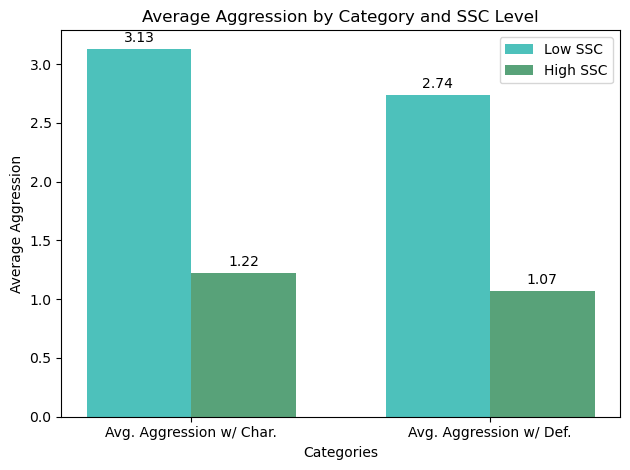

In [74]:
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Avg. Aggression w/ Char.', 'Avg. Aggression w/ Def.']
low_values = [average_low_ssc_characteristics, average_low_ssc_defined]
high_values = [average_high_ssc_characteristics, average_high_ssc_defined]

# X locations for the groups
ind = range(len(categories))

# Plotting
fig, ax = plt.subplots()

bar_width = 0.35  # Width of the bars
opacity = 0.8

rects1 = ax.bar(ind, low_values, bar_width, alpha=opacity, color='lightseagreen', label='Low SSC')
rects2 = ax.bar([p + bar_width for p in ind], high_values, bar_width, alpha=opacity, color='seagreen', label='High SSC')

# Add text for labels, title, and axes ticks
ax.set_xlabel('Categories')
ax.set_ylabel('Average Aggression')
ax.set_title('Average Aggression by Category and SSC Level')
ax.set_xticks([p + bar_width / 2 for p in ind])
ax.set_xticklabels(categories)
ax.legend()

# Function to attach a text label above each bar
def add_value_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to add labels
add_value_labels(rects1)
add_value_labels(rects2)

plt.tight_layout()
plt.show()


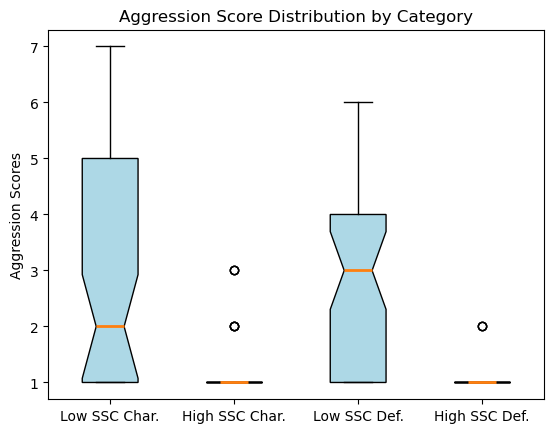

In [75]:
import matplotlib.pyplot as plt

# Assuming your DataFrame df and the relevant columns
columns_to_plot = ['low ssc characteristics', 'high ssc characteristics', 'low ssc defined', 'high ssc defined']

# Prepare data for the box plot
data_to_plot = [df[col].dropna() for col in columns_to_plot]

# Creating the box plot
fig, ax = plt.subplots()

# Adding patch_artist=True option to fill with color
bp = ax.boxplot(data_to_plot, patch_artist=True, notch=True, medianprops={'linewidth': 2})

colors = ['lightblue', 'lightgreen', 'lightblue', 'lightgreen']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Adding labels
ax.set_xticklabels(['Low SSC Char.', 'High SSC Char.', 'Low SSC Def.', 'High SSC Def.'])
ax.set_ylabel('Aggression Scores')
ax.set_title('Aggression Score Distribution by Category')

plt.show()


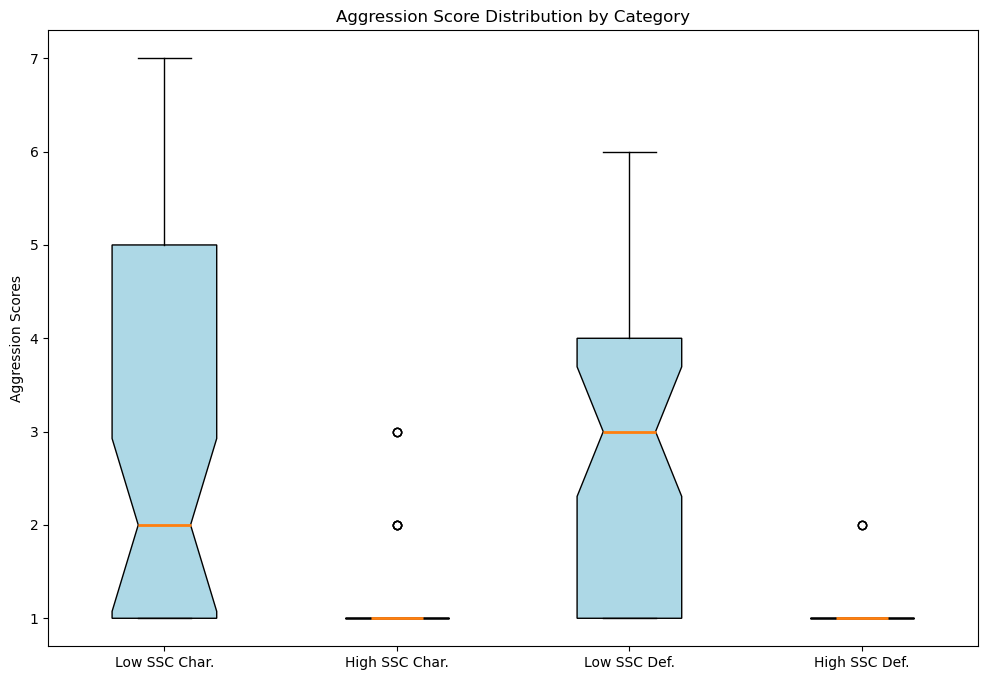

In [82]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with the relevant columns
columns_to_plot = ['low ssc characteristics', 'high ssc characteristics', 'low ssc defined', 'high ssc defined']

# Prepare data for the box plot
data_to_plot = [df[col].dropna() for col in columns_to_plot]

# Creating the box plot with increased figure size
fig, ax = plt.subplots(figsize=(12, 8))  # Set the size here (width, height)

# Adding patch_artist=True option to fill with color
bp = ax.boxplot(data_to_plot, patch_artist=True, notch=True, medianprops={'linewidth': 2})

# Define your colors for the boxes
colors = ['lightblue', 'lightgreen', 'lightblue', 'lightgreen']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Adding labels
ax.set_xticklabels(['Low SSC Char.', 'High SSC Char.', 'Low SSC Def.', 'High SSC Def.'])
ax.set_ylabel('Aggression Scores')
ax.set_title('Aggression Score Distribution by Category')

plt.show()


Clearly overestimates HIGH SSC Individuals


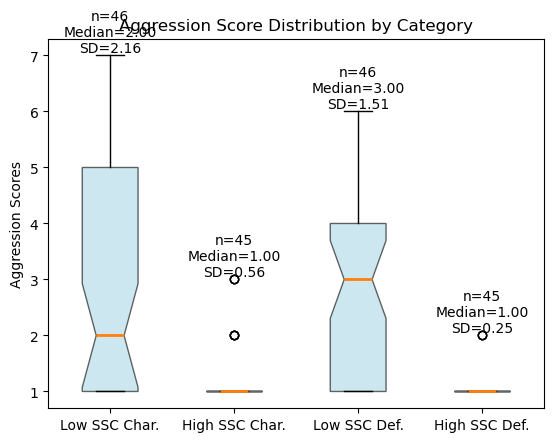

In [80]:
import matplotlib.pyplot as plt

# Assuming your DataFrame df and the relevant columns
columns_to_plot = ['low ssc characteristics', 'high ssc characteristics', 'low ssc defined', 'high ssc defined']

# Prepare data for the box plot
data_to_plot = [df[col].dropna() for col in columns_to_plot]

# Creating the box plot
fig, ax = plt.subplots()

# Setting alpha (transparency) for the box plots
box_plot_alpha = 0.6  # Adjust this value for desired transparency

# Adding patch_artist=True option to fill with color
bp = ax.boxplot(data_to_plot, patch_artist=True, notch=True, medianprops={'linewidth': 2}, boxprops=dict(alpha=box_plot_alpha))

colors = ['lightblue', 'lightgreen', 'lightblue', 'lightgreen']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Adding labels
ax.set_xticklabels(['Low SSC Char.', 'High SSC Char.', 'Low SSC Def.', 'High SSC Def.'])
ax.set_ylabel('Aggression Scores')
ax.set_title('Aggression Score Distribution by Category')

# Annotating with number of samples, median values, and standard deviation
for i, col in enumerate(columns_to_plot):
    num_samples = len(df[col].dropna())
    median_value = df[col].median()
    std_dev = df[col].std()  # Calculating standard deviation
    ax.text(i + 1, max(data_to_plot[i]), f'n={num_samples}\nMedian={median_value:.2f}\nSD={std_dev:.2f}', ha='center', va='bottom')

plt.show()
